# Part II: Tapqir analysis (Colab)

In this tutorial we will use a Jupyter notebook to analyze the Data set A in [Ordabayev et al., 2022](https://doi.org/10.7554/eLife.73860). To work with the live version of the notebook run it in Google Colab using the link above. The data are taken from [Rosen et al., 2020](https://dx.doi.org/10.1073/pnas.2011224117) and have already been preprocesssed using [imscroll](https://github.com/gelles-brandeis/CoSMoS_Analysis/wiki) ([Friedman et al., 2015](https://dx.doi.org/10.1016/j.ymeth.2015.05.026)).

## Set up the environment

* Change runtime to GPU (in the menu select `Runtime -> Change runtime type -> GPU`)
* Connect Google Drive to be able to save the analysis output (to view Files & Folders click on a Folder icon on the left):

In [1]:
# Run this cell to connect to Google Drive
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


* Run the cell below to install `tapqir` (takes about a minute):

In [2]:
!pip install --quiet git+https://github.com/gelles-brandeis/tapqir.git > install.log

## Download input data

These data were acquired with [Glimpse](https://github.com/gelles-brandeis/Glimpse) and pre-processed with the [imscroll](https://github.com/gelles-brandeis/CoSMoS_Analysis/wiki) program ([Friedman et al., 2015](https://dx.doi.org/10.1016/j.ymeth.2015.05.026)). Change directory to MyDrive:

In [3]:
%cd drive/MyDrive/

/content/drive/MyDrive


Download data files using [wget](https://www.gnu.org/software/wget/) and then unzip files:

In [ ]:
!wget https://zenodo.org/record/5659927/files/DatasetA_glimpse.zip
!unzip DatasetA_glimpse.zip && rm DatasetA_glimpse.zip

The raw input data are:

* `garosen00267` - folder containing image data in glimpse format and header files
* `green_DNA_locations.dat` - aoiinfo file designating target molecule (DNA) locations in the binder channel
* `green_nonDNA_locations.dat` - aoiinfo file designating off-target (nonDNA) locations in the binder channel
* `green_driftlist.dat` - driftlist file recording the stage movement that took place during the experiment

To start the analysis create an empty folder (here named `tutorial`) which will be the working directory:

In [ ]:
%mkdir tutorial

## Start the program
To start the program run:

[KeOps] Compiling cuda jit compiler engine ... OK
[pyKeOps] Compiling nvrtc binder for python ... OK


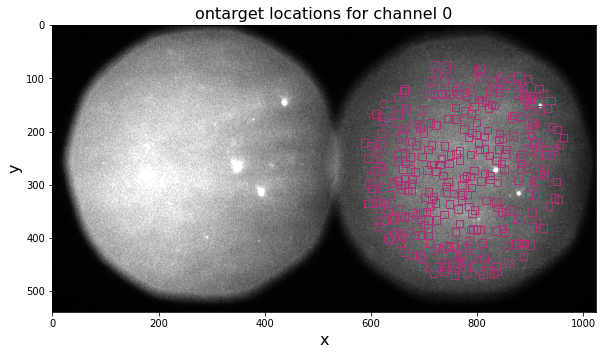

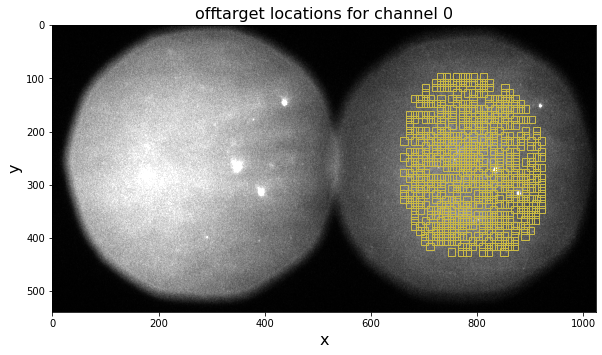

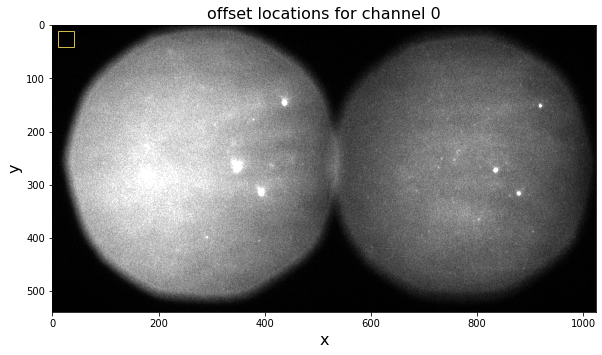

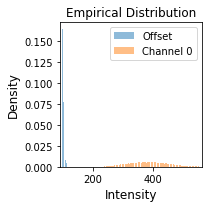

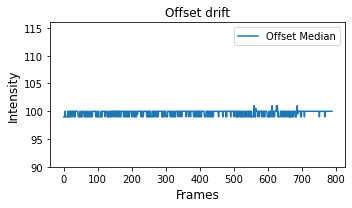

In [5]:
from tapqir import gui

gui.run()

which will display the Tapqir GUI:

<img src="https://github.com/gelles-brandeis/tapqir/blob/latest/docs/source/tutorials/start-page.png?raw=true" width="800" />

## Select working directory

Click the `Select` button at the top to set the working directory to `/content/drive/MyDrive/tutorial`:

<img src="https://github.com/gelles-brandeis/tapqir/blob/latest/docs/source/tutorials/working-directory_colab.png?raw=true" width="800" />

Setting working directory creates a `.tapqir` sub-folder that will store internal files such as `config.yaml` configuration file, `loginfo` logging file, and model checkpoints.

## Extract AOIs

To extract AOIs specify the following options in the `Extract AOIs` tab:

* A dataset name: `Rpb1SNAP549` (an arbitrary name)
* Size of AOI images: we recommend to use `14` pixels
* Starting and ending frame numbers to be included in the analysis (`1` and `790`). If starting and ending frames are not specified then the full range of frames from the driftlist file will be analyzed.
* The number of color channels `1` (this data set has only one color channel available)
* Use off-target AOI locations?: `True` (we recommended including off-target AOI locations in the analysis).

And specify the locations of input files for each color channel (only one color channel in this example):

* Channel name: `SNAP549` (an arbitrary name)
* Header/glimpse folder: `/content/drive/MyDrive/tutorial/DatasetA_glimpse/garosen00267`
* Driftlist file: `/content/drive/MyDrive/tutorial/DatasetA_glimpse/green_driftlist.dat`
* Target molecule locations file: `/content/drive/MyDrive/tutorial/DatasetA_glimpse/green_DNA_locations.dat`
* Off-target control locations file: `/content/drive/MyDrive/tutorial/DatasetA_glimpse/green_nonDNA_locations.dat`

> **About indexing**. In Python indexing starts with 0. We stick to this convention and index AOIs, frames, color channels, and pixels starting with 0. Note, however, that for starting and ending frame numbers we used `1` and `790` which are according to Matlab indexing convention (in Matlab indexing starts with 1) since driftlist file was produced using a Matlab script.

Next, click Extract AOIs button:

<img src="https://github.com/gelles-brandeis/tapqir/blob/latest/docs/source/tutorials/extract-aois_colab.png?raw=true" width="800" />

Great! The program has outputted a `data.tpqr` file containing extracted AOI images (N=331 target and Nc=526 off-target control locations):

In [ ]:
# list current folder content
%ls

total 1.1G
-rw------- 1 root root 1.1G Sep 20 22:06 data.tpqr
drwx------ 3 root root 4.0K Aug 20 19:39 Rpb1SNAP549_glimpse/
drwx------ 2 root root 4.0K Sep 20 22:06 .tapqir/


Additionally, the program has saved

* Image files (`ontarget-channel0.png` and `offtarget-channel0.png`) displaying locations of on-target and off-target AOIs in the first frame. You should inspect these images to make sure that AOIs are inside the field of view:

  <img src="https://github.com/gelles-brandeis/tapqir/blob/latest/docs/source/tutorials/ontarget-channel0.png?raw=true" width="700" />
  <img src="https://github.com/gelles-brandeis/tapqir/blob/latest/docs/source/tutorials/offtarget-channel0.png?raw=true" width="700" />

* You should also look at `offset-channel0.png` to check that offset data is taken from a region outside the field of view:

  <img src="https://github.com/gelles-brandeis/tapqir/blob/latest/docs/source/tutorials/offset-channel0.png?raw=true" width="700" />

* The other two files show the intensity histograms (`offset-distribution.png`) and the offset median time record (`offset-medians.png`) (offset distribution shouldn’t drift over time):

  <img src="https://github.com/gelles-brandeis/tapqir/blob/latest/docs/source/tutorials/offset-distribution.png?raw=true" width="300" />
  <img src="https://github.com/gelles-brandeis/tapqir/blob/latest/docs/source/tutorials/offset-medians.png?raw=true" width="500" />

## Fit the data

Now the data is ready for fitting. Options that we will select:

* Model - the default single-color time-independent `cosmos` model ([Ordabayev et al., 2022](https://doi.org/10.7554/eLife.73860)).
* Color channel number - first chanel (`0`) (there is only one color channel in this data)
* Run computations on GPU: yes (`True`).
* AOI batch size - use default (`10`).
* Frame batch size - use default (`512`).
* Learning rate - use default (`0.005`).
* Number of iterations - use default (`0`)

> **About batch size**. Batch sizes should impact *training time* and *memory consumption*. Ideally, it should not affect the final result. Batch sizes can be optimized for a particular GPU hardware by trying different batch size values and comparing training time/memory usage (`nvidia-smi` shell command shows Memory-Usage and GPU-Util values).

Next, press `Fit the data` button:

<img src="https://github.com/gelles-brandeis/tapqir/blob/latest/docs/source/tutorials/fit-data.png?raw=true" width="800" />

The program will automatically save a checkpoint every 200 iterations (checkpoint is saved at `.tapqir/cosmos-channel0-model.tpqr`). The program can be stopped at any time by clicking in the terminal window and pressing `Ctrl-C`. To restart the program again re-run `tapqir-gui` command and the program will resume from the last saved checkpoint.

After fitting is finished, the program computes 95% credible intervals (CI) of model parameters and saves the parameters and CIs in `cosmos-channel0-params.tqpr`, `cosmos-channel0-params.mat` (if Matlab format is selected), and `cosmos-channel0-summary.csv` files.

If you get an error message saying that there is a memory overflow you can decrease either frame batch size (e.g., to `128` or `256`) or AOI batch size (e.g., to `5`).

### Tensorboard

At every checkpoint the values of global variational parameters (`-ELBO`, `gain_loc`, `proximity_loc`, `pi_mean`, `lamda_loc`) are recorded. Fitting progress can be inspected while fitting is taking place or afterwards with the [tensorboard gui](https://www.tensorflow.org/tensorboard) displayed in the Tensorboard tab, which shows the parameters values as a function of iteration number:

<img src="https://github.com/gelles-brandeis/tapqir/blob/latest/docs/source/tutorials/tensorboard-tab.png?raw=true" width="800" />

Set smoothing to 0 (in the left panel) and use refresh button at the top right to refresh plots.

Plateaued plots signify convergence.

> **About number of iterations**. Fitting the data requires many iterations (about 50,000-100,000) until parameters converge. Setting the number of iterations to 0 will run the program till Tapqir’s custom convergence criteria is satisfied. We recommend to set it to 0 (default) and then run for additional number of iterations if required.

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir .